In [91]:
#Prerequisite libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import accuracy_score,recall_score,precision_score,auc,confusion_matrix,f1_score,precision_recall_fscore_support,classification_report

## Table of Contents
1. [Data Acquisition](#DA) - Data source
2. [Exploratory Data Analysis](#EDA) - Insights of the key characteristics
3. [Feature Engineering](#FE) - Feature discovery
4. [Modelling](#M) - Model development
5. [Conclusion](#CN)

## 1. Data Acquisition <a class="anchor" id="DA"></a>

Data sets are fetched from reading .csv files.

In [92]:
data=pd.read_csv("bank-additional-full.csv")

data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## 2. Exploratory Data Analysis <a class="anchor" id="EDA"></a>
### 2.1 Data information
Understanding the given dataset and helps clean up the dataset.

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### 2.2 Missing values
Detecting Null or NA values in the dataframe in order to avoid bias or the loss of accuracy.

In [94]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [95]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### 2.3 Duplicate rows
Detecting duplicate rows in the dataframe in order to avoid bias or the loss of accuracy.

In [96]:
data.duplicated().value_counts()

False    41176
True        12
dtype: int64

In [97]:
data=data.drop_duplicates()

In [98]:
data.shape

(41176, 21)

### 2.4 Categorical Variables
Finding categorical variables that need to be one-hot encoded in the future.

In [99]:
categorical=[]

#Finding character variables in the data frame
for i in data.columns:
    if data[i].dtype=='O':
        categorical.append(i)

In [100]:
categorical

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

### 2.5 Data balance
Finding categorical variables that need to be one-hot encoded in the future.

In [101]:
data['y'].value_counts()

no     36537
yes     4639
Name: y, dtype: int64

<AxesSubplot:>

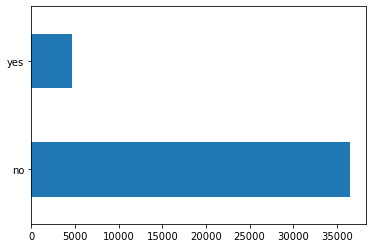

In [102]:
data['y'].value_counts().plot(kind='barh')

#### 2.5.1 Undersampling

In [103]:
# Class count
count_class_0, count_class_1 = data['y'].value_counts()

# Divide by class
data_class_0 = data[data['y'] == 'no']
data_class_1 = data[data['y'] == 'yes']

In [104]:
data_class_0

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


In [105]:
data_class_0_under = data_class_0.sample(n=count_class_1)
data_under = pd.concat([data_class_0_under, data_class_1], axis=0)

data_under['y'].value_counts()

no     4639
yes    4639
Name: y, dtype: int64

<AxesSubplot:>

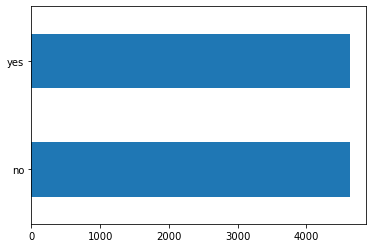

In [106]:
data_under['y'].value_counts().plot(kind='barh')

In [107]:
data_under1=data_under
data_under2=data_under
data_under3=data_under

#### 2.5.2 Oversampling

In [108]:
data_class_1_over = data_class_1.sample(count_class_0, replace=True)
data_over = pd.concat([data_class_0, data_class_1_over], axis=0)

data_over['y'].value_counts()

no     36537
yes    36537
Name: y, dtype: int64

<AxesSubplot:>

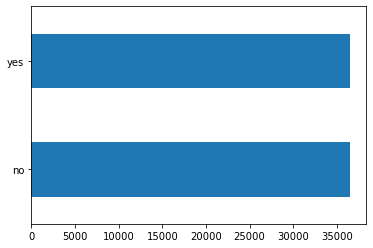

In [109]:
data_over['y'].value_counts().plot(kind='barh')

In [110]:
data_over1=data_over
data_over2=data_over
data_over3=data_over

### 2.6 Outlier removal
Outliers are those data points which differs significantly from other observations present in given dataset. It can occur because of variability in measurement and due to misinterpretation in filling data points.

One of the simplest methods for detecting outliers is box plots. A box plot is a graphical display for describing the distributions of the data. Box plots use the median and the lower and upper quartiles. 

In [111]:
data_under.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,9278.000000,9278.000000,9278.000000,9278.000000,9278.000000,9278.000000,9278.000000,9278.000000,9278.000000,9278.000000
mean,40.464109,385.545807,2.361069,889.391033,0.309442,-0.496185,93.475395,-40.198286,2.968377,5135.815176
std,12.061623,364.471857,2.473933,311.211124,0.694967,1.723853,0.631414,5.341450,1.888038,86.984131
min,17.000000,4.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,142.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-42.700000,1.244000,5076.200000
50%,38.000000,262.000000,2.000000,999.000000,0.000000,-0.100000,93.444000,-41.800000,4.021000,5191.000000
75%,48.000000,520.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.959000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [112]:
data_over.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,73074.000000,73074.000000,73074.00000,73074.000000,73074.000000,73074.000000,73074.000000,73074.000000,73074.000000,73074.000000
mean,40.421846,388.550114,2.33763,889.709363,0.308044,-0.485652,93.480253,-40.214109,2.976996,5136.241045
std,12.063224,362.278330,2.35814,310.792750,0.686579,1.722760,0.631334,5.327126,1.888832,86.600243
min,17.000000,0.000000,1.00000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,144.000000,1.00000,999.000000,0.000000,-1.800000,92.893000,-42.700000,1.250000,5076.200000
50%,38.000000,265.000000,2.00000,999.000000,0.000000,-0.100000,93.444000,-41.800000,4.021000,5191.000000
75%,48.000000,529.000000,3.00000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.959000,5228.100000
max,98.000000,4918.000000,56.00000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


The standard deviation indicates the dispersion of the data relative to its mean and is calculated as the square root of the variance.

From above results, we can see that 'duration','pdays' and 'nr.employed' have high std. However, 'pdays' aligns with uniform distribution and can not be dealt with quartile removal. In this way, we decide to remove outliers for the other features first by drawing box plot.

Text(0.5, 1.0, 'Distribution of pdays')

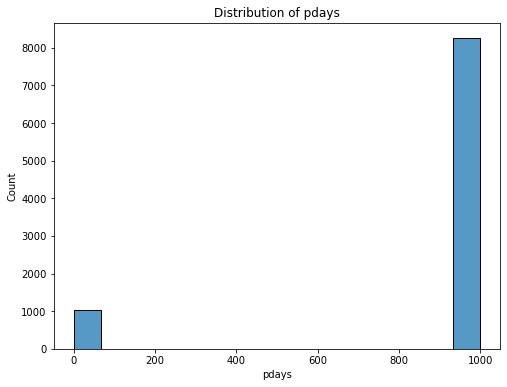

In [113]:
fig,ax=plt.subplots(figsize=(8,6))
#ax.set_xlim(0,)
sns.histplot(data_under['pdays'],ax=ax).set_title('Distribution of pdays')

'duration' of undersample

Text(0.5, 0, 'feature')

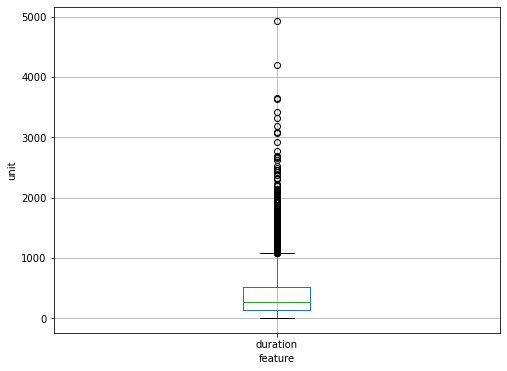

In [114]:
#Box plot
boxplot=data_under1.boxplot(column=['duration'],figsize=(8,6))
boxplot.set_ylabel('unit')
boxplot.set_xlabel('feature')

In [115]:
num1=data_under1.shape[0]
Q1 = data_under1['duration'].quantile(0.25)
Q3 = data_under1['duration'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (data_under1['duration'] >= Q1 - 1.5 * IQR) & (data_under1['duration'] <= Q3 + 1.5 *IQR)
data_under1=data_under1.loc[filter]

Text(0.5, 0, 'feature')

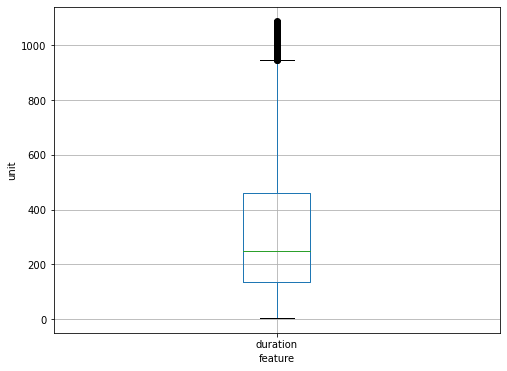

In [116]:
#Box plot
boxplot=data_under1.boxplot(column=['duration'],figsize=(8,6))
boxplot.set_ylabel('unit')
boxplot.set_xlabel('feature')

'nr.employed' of undersample

Text(0.5, 0, 'feature')

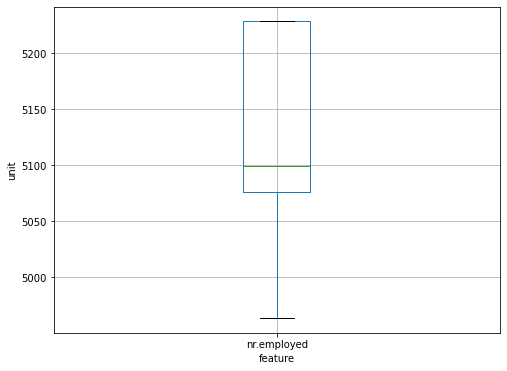

In [117]:
#Box plot
boxplot=data_under1.boxplot(column=['nr.employed'],figsize=(8,6))
boxplot.set_ylabel('unit')
boxplot.set_xlabel('feature')

In [118]:
num1=data_under1.shape[0]
Q1 = data_under1['nr.employed'].quantile(0.25)
Q3 = data_under1['nr.employed'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (data_under1['nr.employed'] >= Q1 - 1.5 * IQR) & (data_under1['nr.employed'] <= Q3 + 1.5 *IQR)
data_under1=data_under1.loc[filter]

Text(0.5, 0, 'feature')

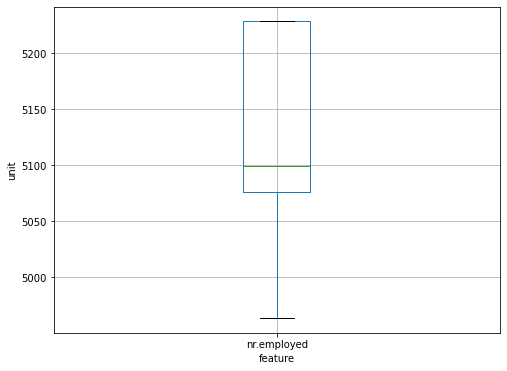

In [119]:
#Box plot
boxplot=data_under1.boxplot(column=['nr.employed'],figsize=(8,6))
boxplot.set_ylabel('unit')
boxplot.set_xlabel('feature')

In [120]:
data_under1.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,8801.000000,8801.000000,8801.000000,8801.000000,8801.000000,8801.000000,8801.000000,8801.000000,8801.000000,8801.000000
mean,40.496648,327.255312,2.346211,885.367572,0.318941,-0.532087,93.468022,-40.164731,2.930376,5134.009635
std,12.150197,251.014392,2.489708,316.151925,0.706281,1.725737,0.634690,5.381898,1.888596,87.213847
min,17.000000,4.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,136.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-42.700000,1.244000,5076.200000
50%,38.000000,247.000000,2.000000,999.000000,0.000000,-1.100000,93.444000,-41.800000,1.757000,5099.100000
75%,48.000000,460.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.958000,5228.100000
max,98.000000,1087.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [121]:
data_under1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
20942,39,admin.,single,university.degree,no,no,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
33794,29,admin.,married,university.degree,no,no,no,cellular,may,wed,...,5,999,1,failure,-1.8,92.893,-46.2,1.281,5099.1,no
15807,47,housemaid,divorced,basic.4y,unknown,no,no,cellular,jul,mon,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no
32437,35,management,married,professional.course,no,no,yes,cellular,may,fri,...,3,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
17954,41,housemaid,divorced,high.school,unknown,yes,yes,cellular,jul,tue,...,5,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,...,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## 3. Feature Engineering <a class="anchor" id="FE"></a>

A variaty of pre-processing steps on dealing with features to improve the performance of models.

### 3.1 Heatmap
Those VIFs who are greater than 10 would be considered as high multicollinearity features, thus should be removed.

C:\Users\intwe\AppData\Local\Temp\ipykernel_10344\2744395354.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_under1.corr(), annot=True, cmap='YlGnBu')


<AxesSubplot:>

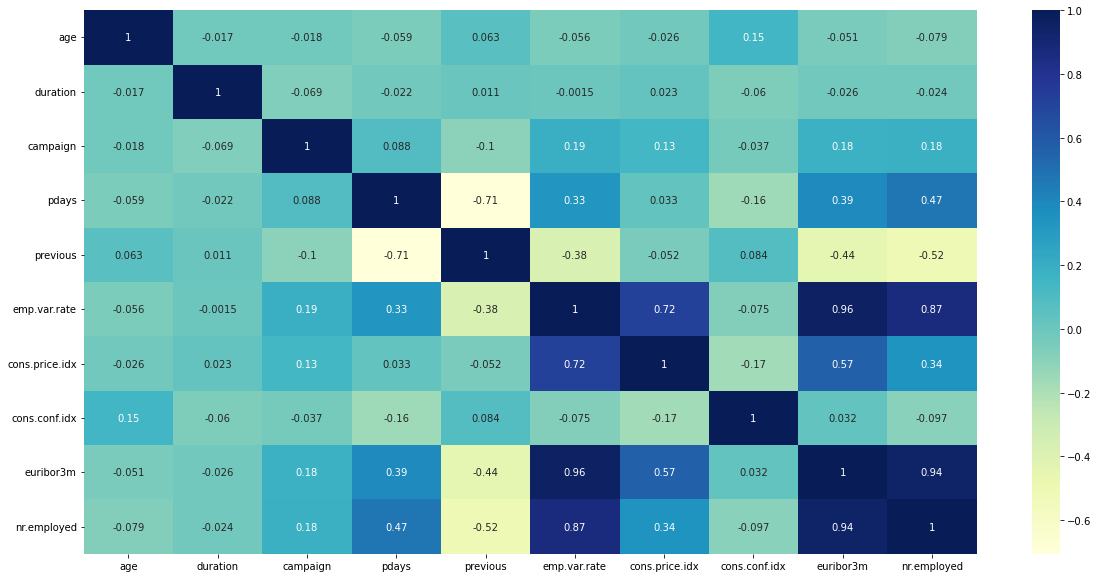

In [122]:
plt.figure(figsize=(20,10))
sns.heatmap(data_under1.corr(), annot=True, cmap='YlGnBu')

In [123]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [124]:
X = data_under2[['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]
result=calc_vif(X)
result

,variables,VIF
0,age,12.591535
1,duration,2.143453
2,campaign,1.996390
3,pdays,19.257956
4,previous,2.632719
5,emp.var.rate,27.414266
6,cons.price.idx,16774.898965
7,cons.conf.idx,85.435790
8,euribor3m,135.980052
9,nr.employed,19982.063128


In [125]:
data_under3=data_under3[[str(i) for i in result[result['VIF']<10]['variables']]]
data_under3

,duration,campaign,previous
20942,421,1,0
33794,101,5,1
15807,255,1,0
32437,376,3,0
17954,185,5,0
...,...,...,...
41174,208,1,6
41178,483,2,3
41181,281,1,0
41183,334,1,0


### 3.2 Multicollinearity function
Using Variable Inflation Factor (VIF), setting it with a default threshold of 5.0. Those features that are greater than 5.0 would be considered high multicollinearity and will be removed.

In [126]:
from joblib import Parallel, delayed
from statsmodels.stats.outliers_influence import variance_inflation_factor
    
def removeMultiColl(data, vif_threshold = 5.0):
    for i in data.columns:
        if data[i].nunique() == 1:
            print(f"Dropping {i} due to just 1 unique value")
            data.drop(columns = i, inplace = True)
    drop = True
    col_list = list(data.columns)
    while drop == True:
        drop = False
        vif_list = Parallel(n_jobs = -1, verbose = 5)(delayed(variance_inflation_factor)(data[col_list].values, i) for i in range(data[col_list].shape[1]))
        max_index = vif_list.index(max(vif_list))
        if vif_list[max_index] > vif_threshold:
            print(f"Dropping column : {col_list[max_index]} at index - {max_index}")
            del col_list[max_index]
            drop = True
    print("Remaining columns :\n", list(data[col_list].columns))
    return data[col_list]

In [127]:
data_test=removeMultiColl(X)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    6.1s remaining:    9.1s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    6.1s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Dropping column : nr.employed at index - 9
Dropping column : cons.price.idx at index - 6
Dropping column : cons.conf.idx at index - 6
Dropping column : euribor3m at index - 6
Dropping column : age at index - 0
Remaining columns :
 ['duration', 'campaign', 'pdays', 'previous', 'emp.var.rate']


[Parallel(n_jobs=-1)]: Done   2 out of   9 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent w

In [128]:
data_test

,duration,campaign,pdays,previous,emp.var.rate
20942,421,1,999,0,1.4
33794,101,5,999,1,-1.8
15807,255,1,999,0,1.4
32437,376,3,999,0,-1.8
17954,185,5,999,0,1.4
...,...,...,...,...,...
41174,208,1,1,6,-1.1
41178,483,2,6,3,-1.1
41181,281,1,999,0,-1.1
41183,334,1,999,0,-1.1


In [129]:
data_undersample1=data_under[categorical].join(data_under3)

In [130]:
data_undersample1

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y,duration,campaign,previous
20942,admin.,single,university.degree,no,no,no,cellular,aug,thu,nonexistent,no,421,1,0
33794,admin.,married,university.degree,no,no,no,cellular,may,wed,failure,no,101,5,1
15807,housemaid,divorced,basic.4y,unknown,no,no,cellular,jul,mon,nonexistent,no,255,1,0
32437,management,married,professional.course,no,no,yes,cellular,may,fri,nonexistent,no,376,3,0
17954,housemaid,divorced,high.school,unknown,yes,yes,cellular,jul,tue,nonexistent,no,185,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,retired,married,university.degree,no,yes,no,cellular,nov,thu,success,yes,208,1,6
41178,retired,married,university.degree,no,no,no,cellular,nov,thu,success,yes,483,2,3
41181,admin.,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,yes,281,1,0
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes,334,1,0


In [131]:
data_undersample2=data_under[categorical].join(data_test)

In [132]:
data_undersample2

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y,duration,campaign,pdays,previous,emp.var.rate
20942,admin.,single,university.degree,no,no,no,cellular,aug,thu,nonexistent,no,421,1,999,0,1.4
33794,admin.,married,university.degree,no,no,no,cellular,may,wed,failure,no,101,5,999,1,-1.8
15807,housemaid,divorced,basic.4y,unknown,no,no,cellular,jul,mon,nonexistent,no,255,1,999,0,1.4
32437,management,married,professional.course,no,no,yes,cellular,may,fri,nonexistent,no,376,3,999,0,-1.8
17954,housemaid,divorced,high.school,unknown,yes,yes,cellular,jul,tue,nonexistent,no,185,5,999,0,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,retired,married,university.degree,no,yes,no,cellular,nov,thu,success,yes,208,1,1,6,-1.1
41178,retired,married,university.degree,no,no,no,cellular,nov,thu,success,yes,483,2,6,3,-1.1
41181,admin.,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,yes,281,1,999,0,-1.1
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes,334,1,999,0,-1.1


## 4. Modelling <a class="anchor" id="M"></a>

We try out Logistic Regression, SVM, Random Forest, Xgboost algorithms to compare the accuracy performance.

### 4.1 Data with all features
#### 4.1.1 Logistic Regression

In [43]:
data_under4=data_under

In [44]:
data_under4

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
24533,40,blue-collar,married,basic.4y,no,no,yes,cellular,nov,mon,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
3620,26,student,single,unknown,unknown,no,no,telephone,may,fri,...,5,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
36821,34,blue-collar,married,basic.4y,no,yes,no,cellular,jun,mon,...,2,999,0,nonexistent,-2.9,92.963,-40.8,1.260,5076.2,no
6030,34,services,married,high.school,no,no,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
33698,32,blue-collar,single,basic.9y,unknown,yes,no,telephone,may,wed,...,1,999,1,failure,-1.8,92.893,-46.2,1.281,5099.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,...,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [45]:
for i in categorical:
    
    #Renameing variables to avoid repetition and ambiguity
    one_hot=pd.get_dummies(data_under4[i]).rename(columns=lambda x:i+'_'+str(x))
    
    #Removal of the last one-hot column to avoid multicollinearity
    one_hot=one_hot.iloc[:,:-1]
    data_under4=data_under4.drop(columns=i)
    data_under4=data_under4.join(one_hot)

In [46]:
data_under4

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,poutcome_failure,poutcome_nonexistent,y_no
24533,40,143,2,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,0,1,0,0,1,0,0,0,1,1
3620,26,277,5,999,0,1.1,93.994,-36.4,4.859,5191.0,...,1,0,0,1,0,0,0,0,1,1
36821,34,88,2,999,0,-2.9,92.963,-40.8,1.260,5076.2,...,0,0,0,0,1,0,0,0,1,1
6030,34,514,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,0,1,0,1,1
33698,32,134,1,999,1,-1.8,92.893,-46.2,1.281,5099.1,...,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,62,208,1,1,6,-1.1,94.767,-50.8,1.031,4963.6,...,0,1,0,0,0,1,0,0,0,0
41178,62,483,2,6,3,-1.1,94.767,-50.8,1.031,4963.6,...,0,1,0,0,0,1,0,0,0,0
41181,37,281,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,1,0,0,0,0,1,0
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,1,0,0,0,0,1,0


In [47]:
#Input of data
X=data_under4.drop(columns=['y_no'])

#Output of data
y=data_under4['y_no']

In [48]:
#Data normalization
Scaler=StandardScaler()
X_=Scaler.fit_transform(X)

In [49]:
#75% of training and 25% of testing
X_train,X_test,y_train,y_test=train_test_split(X_,y,test_size=0.25,random_state=0)

In [50]:
#Before normalization()
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,test_size=0.25,random_state=0)

In [51]:
lr= LogisticRegression()

lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

print("Training Accuracy of LogisticRegression : ",lr.score(X_train,y_train))
print("Testing Accuracy of LogisticRegression : ",accuracy_score(y_test,y_pred))



Training Accuracy of LogisticRegression :  0.87180224202357
Testing Accuracy of LogisticRegression :  0.8745689655172414


In [54]:
print(accuracy_score(y_pred,y_test))
print(recall_score(y_pred,y_test))
print(precision_score(y_pred,y_test))
print(f1_score(y_pred,y_test))

0.8745689655172414
0.8817391304347826
0.8674080410607357
0.8745148771021992


In [52]:
importance = lr.coef_[0]
#print(importance)
# summarize feature importance
for i,v in zip(data_under4.columns,importance):
    print('Feature: %s, Score: %.5f' % (i,v))

Feature: age, Score: 0.02359
Feature: duration, Score: -2.48044
Feature: campaign, Score: 0.07525
Feature: pdays, Score: 0.41417
Feature: previous, Score: -0.02172
Feature: emp.var.rate, Score: 2.96359
Feature: cons.price.idx, Score: -1.09449
Feature: cons.conf.idx, Score: 0.02895
Feature: euribor3m, Score: -1.07259
Feature: nr.employed, Score: 0.21174
Feature: job_admin., Score: 0.05930
Feature: job_blue-collar, Score: 0.09747
Feature: job_entrepreneur, Score: -0.00755
Feature: job_housemaid, Score: -0.04106
Feature: job_management, Score: 0.04588
Feature: job_retired, Score: -0.10487
Feature: job_self-employed, Score: 0.09867
Feature: job_services, Score: 0.07188
Feature: job_student, Score: -0.01560
Feature: job_technician, Score: 0.05731
Feature: job_unemployed, Score: 0.00302
Feature: marital_divorced, Score: -0.02656
Feature: marital_married, Score: -0.14425
Feature: marital_single, Score: -0.19878
Feature: education_basic.4y, Score: 0.02987
Feature: education_basic.6y, Score: 0.

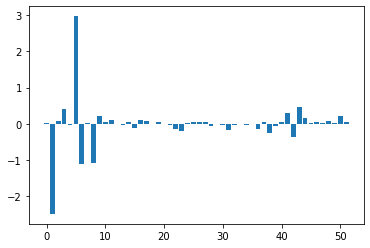

In [53]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#### 4.1.2 SVM

In [56]:
from sklearn import svm
svm=svm.SVC(kernel='linear')

svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)

print("Training Accuracy of SVM : ",svm.score(X_train,y_train))
print("Testing Accuracy of SVM : ",accuracy_score(y_test,y_pred_svm))


Training Accuracy of SVM :  0.8746766312158666
Testing Accuracy of SVM :  0.878448275862069


In [57]:
print(accuracy_score(y_pred_svm,y_test))
print(recall_score(y_pred_svm,y_test))
print(precision_score(y_pred_svm,y_test))
print(f1_score(y_pred_svm,y_test))

0.878448275862069
0.9042844120328167
0.8485885372112917
0.8755516328331863


#### 4.1.3 Random Forest

In [55]:
rd_classifier=RandomForestClassifier(random_state=100,n_jobs=-1,verbose=True)
rd_classifier.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


RandomForestClassifier(n_jobs=-1, random_state=100, verbose=True)

In [56]:
rd_classifier_train_preds =rd_classifier.predict(X_train)
rd_classifier_preds=rd_classifier.predict(X_test)

precision_recall_fscore_support(y_train,rd_classifier_train_preds)
confusion_matrix(y_train,rd_classifier_train_preds)


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


array([[3488,    0],
       [   0, 3470]], dtype=int64)

In [57]:
print(accuracy_score(y_test,rd_classifier_preds))
print(recall_score(y_test,rd_classifier_preds))
print(precision_score(y_test,rd_classifier_preds))
print(f1_score(y_test,rd_classifier_preds))

0.8793103448275862
0.8314798973481609
0.9213270142180094
0.8741007194244604


In [58]:
print(classification_report(y_test,rd_classifier_preds))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1151
           1       0.92      0.83      0.87      1169

    accuracy                           0.88      2320
   macro avg       0.88      0.88      0.88      2320
weighted avg       0.88      0.88      0.88      2320



In [59]:
#Important features in the RF model
imp_dict={'Feature':X_train1.columns.to_list(),'Importance':rd_classifier.feature_importances_}
df_imp_dict=pd.DataFrame(imp_dict).sort_values(by='Importance',ascending=False).set_index('Feature')

In [60]:
df_imp_dict

,Importance
Feature,
duration,0.358997
euribor3m,0.100993
nr.employed,0.068697
age,0.057967
emp.var.rate,0.038405
cons.price.idx,0.031676
cons.conf.idx,0.031412
campaign,0.028968
pdays,0.027504


#### 4.1.4 Xgboost

In [58]:
import xgboost as xgb

dtrain=xgb.DMatrix(X_train,label=y_train)
dtest=xgb.DMatrix(X_test,label=y_test)
num_boost_round = 999

params={'max_depth': 6,
 'min_child_weight': 1,
 'eta': .3,
 'subsample': 1.0,
 'colsample_bytree': 1.0,
 'objective': 'binary:logistic'}

model=xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[0]	Test-logloss:0.53054
[1]	Test-logloss:0.44145
[2]	Test-logloss:0.38536
[3]	Test-logloss:0.35112
[4]	Test-logloss:0.32773
[5]	Test-logloss:0.31089
[6]	Test-logloss:0.30061
[7]	Test-logloss:0.29302
[8]	Test-logloss:0.28664
[9]	Test-logloss:0.28287
[10]	Test-logloss:0.28050
[11]	Test-logloss:0.28053
[12]	Test-logloss:0.27772
[13]	Test-logloss:0.27795
[14]	Test-logloss:0.27821
[15]	Test-logloss:0.27649
[16]	Test-logloss:0.27708
[17]	Test-logloss:0.27671
[18]	Test-logloss:0.27700
[19]	Test-logloss:0.27740
[20]	Test-logloss:0.27755
[21]	Test-logloss:0.27749
[22]	Test-logloss:0.27731
[23]	Test-logloss:0.27788
[24]	Test-logloss:0.27723


In [62]:
# Define initial best params and MAE
min_error = float("Inf")
best_params = None
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'error'},
        early_stopping_rounds=10
    )
    # Update best MAE
    #print(cv_results)
    mean_error = cv_results['test-error-mean'].min()
    boost_rounds = cv_results['test-error-mean'].argmin()
    print("\tError {} for {} rounds".format(mean_error, boost_rounds))
    if mean_error < min_error:
        min_error = mean_error
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, Error: {}".format(best_params[0], best_params[1], min_error))

CV with max_depth=9, min_child_weight=5
	Error 0.11310776585107878 for 9 rounds
CV with max_depth=9, min_child_weight=6
	Error 0.11210150226827635 for 28 rounds
CV with max_depth=9, min_child_weight=7
	Error 0.1112390201376666 for 27 rounds
CV with max_depth=10, min_child_weight=5
	Error 0.1133940892601866 for 10 rounds
CV with max_depth=10, min_child_weight=6
	Error 0.1132521670509102 for 9 rounds
CV with max_depth=10, min_child_weight=7
	Error 0.11253315649867375 for 12 rounds
CV with max_depth=11, min_child_weight=5
	Error 0.11224497384664964 for 15 rounds
CV with max_depth=11, min_child_weight=6
	Error 0.11210160555954948 for 14 rounds
CV with max_depth=11, min_child_weight=7
	Error 0.11152627316823256 for 19 rounds
Best params: 9, 7, Error: 0.1112390201376666


In [63]:
params['max_depth'] = 9
params['min_child_weight'] = 7

In [64]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

min_error = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'error'},
        early_stopping_rounds=10
    )
    
    mean_error = cv_results['test-error-mean'].min()
    boost_rounds = cv_results['test-error-mean'].argmin()
    print("\tError {} for {} rounds".format(mean_error, boost_rounds))
    if mean_error < min_error:
        min_error = mean_error
        best_params = (subsample,colsample)
print("Best params: {}, {}, Error: {}".format(best_params[0], best_params[1], min_error))

CV with subsample=1.0, colsample=1.0
	Error 0.1112390201376666 for 27 rounds
CV with subsample=1.0, colsample=0.9
	Error 0.11411433930770057 for 24 rounds
CV with subsample=1.0, colsample=0.8
	Error 0.11353807729492549 for 14 rounds
CV with subsample=1.0, colsample=0.7
	Error 0.11411392614260807 for 21 rounds
CV with subsample=0.9, colsample=1.0
	Error 0.11555132749944223 for 25 rounds
CV with subsample=0.9, colsample=0.9
	Error 0.11296450085525174 for 18 rounds
CV with subsample=0.9, colsample=0.8
	Error 0.11526407446887628 for 14 rounds
CV with subsample=0.9, colsample=0.7
	Error 0.1155512242081691 for 25 rounds
CV with subsample=0.8, colsample=1.0
	Error 0.11583930356892007 for 14 rounds
CV with subsample=0.8, colsample=0.9
	Error 0.11339481229909847 for 19 rounds
CV with subsample=0.8, colsample=0.8
	Error 0.11727701479957361 for 32 rounds
CV with subsample=0.8, colsample=0.7
	Error 0.11655635158696712 for 16 rounds
CV with subsample=0.7, colsample=1.0
	Error 0.1145449606253667 for

In [65]:
params['subsample'] = 1
params['colsample_bytree'] = 1

In [66]:
min_error = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    %time cv_results = xgb.cv(params,dtrain,num_boost_round=num_boost_round,seed=42,nfold=5,metrics=['error'],early_stopping_rounds=10)
    # Update best score
    mean_error = cv_results['test-error-mean'].min()
    boost_rounds = cv_results['test-error-mean'].argmin()
    print("\tError {} for {} rounds\n".format(mean_error, boost_rounds))
    if mean_error < min_error:
        min_error = mean_error
        best_params = eta
print("Best params: {}, Error: {}".format(best_params, min_error))

CV with eta=0.3
CPU times: total: 13.1 s
Wall time: 1.88 s
	Error 0.1112390201376666 for 27 rounds

CV with eta=0.2
CPU times: total: 10.9 s
Wall time: 1.45 s
	Error 0.11353869704256425 for 15 rounds

CV with eta=0.1
CPU times: total: 22.8 s
Wall time: 3.11 s
	Error 0.11281968649032781 for 47 rounds

CV with eta=0.05
CPU times: total: 21.9 s
Wall time: 3.05 s
	Error 0.1172746391002917 for 44 rounds

CV with eta=0.01
CPU times: total: 9.75 s
Wall time: 1.3 s
	Error 0.12747878397249973 for 12 rounds

CV with eta=0.005
CPU times: total: 15.6 s
Wall time: 2.1 s
	Error 0.127047646198468 for 27 rounds

Best params: 0.3, Error: 0.1112390201376666


In [67]:
params['eta'] = .3

In [68]:
params

{'max_depth': 9,
 'min_child_weight': 7,
 'eta': 0.3,
 'subsample': 1,
 'colsample_bytree': 1,
 'objective': 'binary:logistic'}

In [59]:
xgb = xgb.XGBClassifier(max_depth=9,
 min_child_weight= 7,
 eta=0.3,
 subsample= 1,
 colsample_bytree= 1)
xgb.fit(X_train,y_train)

#calculate and print scores for the model
y_train_preds = xgb.predict(X_train)
y_test_preds = xgb.predict(X_test)

In [60]:
print(xgb.score(X_test,y_test))
print(xgb.score(X_train,y_train))

0.884051724137931
0.9698189134808853


In [61]:
print(accuracy_score(y_test,y_test_preds))
print(recall_score(y_test,y_test_preds))
print(precision_score(y_test,y_test_preds))
print(f1_score(y_test,y_test_preds))

0.884051724137931
0.8562874251497006
0.9083484573502723
0.8815499779832673


In [71]:
print(classification_report(y_test,y_test_preds))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1151
           1       0.90      0.85      0.88      1169

    accuracy                           0.88      2320
   macro avg       0.88      0.88      0.88      2320
weighted avg       0.88      0.88      0.88      2320



### 4.2 Data with multicollinearity removal through the heatmap
#### 4.2.1 Logistic Regression

In [62]:
for i in categorical:
    
    #Renameing variables to avoid repetition and ambiguity
    one_hot=pd.get_dummies(data_undersample1[i]).rename(columns=lambda x:i+'_'+str(x))
    
    #Removal of the last one-hot column to avoid multicollinearity
    one_hot=one_hot.iloc[:,:-1]
    data_undersample1=data_undersample1.drop(columns=i)
    data_undersample1=data_undersample1.join(one_hot)

In [63]:
data_undersample1

,duration,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,month_may,month_nov,month_oct,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,poutcome_failure,poutcome_nonexistent,y_no
24533,143,2,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,1
3620,277,5,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,1
36821,88,2,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
6030,514,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,1
33698,134,1,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,208,1,6,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
41178,483,2,3,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
41181,281,1,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
41183,334,1,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0


In [64]:
#Input of data
X_under1=data_undersample1.drop(columns=['y_no'])

#Output of data
y_under1=data_undersample1['y_no']

In [65]:
#Data normalization
Scaler=StandardScaler()
X_under1_=Scaler.fit_transform(X_under1)

In [66]:
#75% of training and 25% of testing
X_train_under1,X_test_under1,y_train_under1,y_test_under1=train_test_split(X_under1_,y_under1,test_size=0.25,random_state=0)

In [67]:
lr= LogisticRegression()

lr.fit(X_train_under1,y_train_under1)
y_pred_under1 = lr.predict(X_test_under1)

print("Training Accuracy of LogisticRegression : ",lr.score(X_train_under1,y_train_under1))
print("Testing Accuracy of LogisticRegression : ",accuracy_score(y_test_under1,y_pred_under1))


Training Accuracy of LogisticRegression :  0.8439206668582926
Testing Accuracy of LogisticRegression :  0.8422413793103448


In [68]:
print(accuracy_score(y_test_under1,y_pred_under1))
print(recall_score(y_test_under1,y_pred_under1))
print(precision_score(y_test_under1,y_pred_under1))
print(f1_score(y_test_under1,y_pred_under1))

0.8422413793103448
0.8622754491017964
0.830997526793075
0.8463476070528967


#### 4.2.2 SVM

In [69]:
from sklearn import svm
svm=svm.SVC(kernel='linear')

svm.fit(X_train_under1,y_train_under1)
y_pred_svm_under1 = svm.predict(X_test_under1)

print("Training Accuracy of SVM : ",svm.score(X_train_under1,y_train_under1))
print("Testing Accuracy of SVM : ",accuracy_score(y_test_under1,y_pred_svm_under1))

Training Accuracy of SVM :  0.8473699338890486
Testing Accuracy of SVM :  0.8426724137931034


In [70]:
print(accuracy_score(y_test_under1,y_pred_svm_under1))
print(recall_score(y_test_under1,y_pred_svm_under1))
print(precision_score(y_test_under1,y_pred_svm_under1))
print(f1_score(y_test_under1,y_pred_svm_under1))

0.8426724137931034
0.8511548331907614
0.8389544688026982
0.8450106157112526


#### 4.2.3 Random Forest

In [71]:
rd_classifier=RandomForestClassifier(random_state=100,n_jobs=-1,verbose=True)
rd_classifier.fit(X_train_under1,y_train_under1)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


RandomForestClassifier(n_jobs=-1, random_state=100, verbose=True)

In [72]:
rd_classifier_train_preds =rd_classifier.predict(X_train_under1)
rd_classifier_preds=rd_classifier.predict(X_test_under1)

precision_recall_fscore_support(y_train_under1,rd_classifier_train_preds)
confusion_matrix(y_train_under1,rd_classifier_train_preds)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


array([[3488,    0],
       [   0, 3470]], dtype=int64)

In [73]:
print(classification_report(y_test_under1,rd_classifier_preds))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1151
           1       0.88      0.82      0.85      1169

    accuracy                           0.85      2320
   macro avg       0.85      0.85      0.85      2320
weighted avg       0.85      0.85      0.85      2320



In [74]:
print(accuracy_score(y_test_under1,rd_classifier_preds))
print(recall_score(y_test_under1,rd_classifier_preds))
print(precision_score(y_test_under1,rd_classifier_preds))
print(f1_score(y_test_under1,rd_classifier_preds))

0.8521551724137931
0.8203592814371258
0.8782051282051282
0.8482972136222909


#### 4.2.4 Xgboost

In [75]:
import xgboost as xgb

dtrain_under1=xgb.DMatrix(X_train_under1,label=y_train_under1)
dtest_under1=xgb.DMatrix(X_test_under1,label=y_test_under1)
num_boost_round = 999

params_under1={'max_depth': 6,
 'min_child_weight': 1,
 'eta': .3,
 'subsample': 1.0,
 'colsample_bytree': 1.0,
 'objective': 'binary:logistic'}

model=xgb.train(
    params_under1,
    dtrain_under1,
    num_boost_round=num_boost_round,
    evals=[(dtest_under1, "Test")],
    early_stopping_rounds=10
)

[0]	Test-logloss:0.56733
[1]	Test-logloss:0.49853
[2]	Test-logloss:0.45181
[3]	Test-logloss:0.42214
[4]	Test-logloss:0.40539
[5]	Test-logloss:0.39163
[6]	Test-logloss:0.38140
[7]	Test-logloss:0.37437
[8]	Test-logloss:0.36884
[9]	Test-logloss:0.36377
[10]	Test-logloss:0.36176
[11]	Test-logloss:0.35817
[12]	Test-logloss:0.35379
[13]	Test-logloss:0.35293
[14]	Test-logloss:0.35246
[15]	Test-logloss:0.35046
[16]	Test-logloss:0.34942
[17]	Test-logloss:0.34844
[18]	Test-logloss:0.34863
[19]	Test-logloss:0.34849
[20]	Test-logloss:0.34588
[21]	Test-logloss:0.34662
[22]	Test-logloss:0.34597
[23]	Test-logloss:0.34614
[24]	Test-logloss:0.34735
[25]	Test-logloss:0.34838
[26]	Test-logloss:0.34838
[27]	Test-logloss:0.34877
[28]	Test-logloss:0.34894
[29]	Test-logloss:0.34838


In [83]:
# Define initial best params and MAE
min_error = float("Inf")
best_params = None
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params_under1['max_depth'] = max_depth
    params_under1['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params_under1,
        dtrain_under1,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'error'},
        early_stopping_rounds=10
    )
    # Update best MAE
    #print(cv_results)
    mean_error = cv_results['test-error-mean'].min()
    boost_rounds = cv_results['test-error-mean'].argmin()
    print("\tError {} for {} rounds".format(mean_error, boost_rounds))
    if mean_error < min_error:
        min_error = mean_error
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, Error: {}".format(best_params[0], best_params[1], min_error))

CV with max_depth=9, min_child_weight=5
	Error 0.1474588280985316 for 14 rounds
CV with max_depth=9, min_child_weight=6
	Error 0.14515915119363396 for 24 rounds
CV with max_depth=9, min_child_weight=7
	Error 0.14472801341960223 for 9 rounds
CV with max_depth=10, min_child_weight=5
	Error 0.14889684920300456 for 10 rounds
CV with max_depth=10, min_child_weight=6
	Error 0.14688349570721468 for 16 rounds
CV with max_depth=10, min_child_weight=7
	Error 0.14745913797235097 for 12 rounds
CV with max_depth=11, min_child_weight=5
	Error 0.14889519654263453 for 12 rounds
CV with max_depth=11, min_child_weight=6
	Error 0.14760240296817803 for 8 rounds
CV with max_depth=11, min_child_weight=7
	Error 0.14501526645016818 for 12 rounds
Best params: 9, 7, Error: 0.14472801341960223


In [84]:
params_under1['max_depth'] = 9
params_under1['min_child_weight'] = 7

In [85]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

min_error = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params_under1['subsample'] = subsample
    params_under1['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params_under1,
        dtrain_under1,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'error'},
        early_stopping_rounds=10
    )
    
    mean_error = cv_results['test-error-mean'].min()
    boost_rounds = cv_results['test-error-mean'].argmin()
    print("\tError {} for {} rounds".format(mean_error, boost_rounds))
    if mean_error < min_error:
        min_error = mean_error
        best_params = (subsample,colsample)
print("Best params: {}, {}, Error: {}".format(best_params[0], best_params[1], min_error))

CV with subsample=1.0, colsample=1.0
	Error 0.14472801341960223 for 9 rounds
CV with subsample=1.0, colsample=0.9
	Error 0.14803292099457102 for 24 rounds
CV with subsample=1.0, colsample=0.8
	Error 0.14400786666336135 for 12 rounds
CV with subsample=1.0, colsample=0.7
	Error 0.14717229810687754 for 13 rounds
CV with subsample=0.9, colsample=1.0
	Error 0.14760240296817803 for 12 rounds
CV with subsample=0.9, colsample=0.9
	Error 0.14760281613327053 for 16 rounds
CV with subsample=0.9, colsample=0.8
	Error 0.14530179644182223 for 13 rounds
CV with subsample=0.9, colsample=0.7
	Error 0.14702738045068048 for 20 rounds
CV with subsample=0.8, colsample=1.0
	Error 0.14587723212441225 for 12 rounds
CV with subsample=0.8, colsample=0.9
	Error 0.14717023228141501 for 20 rounds
CV with subsample=0.8, colsample=0.8
	Error 0.1465953130551906 for 21 rounds
CV with subsample=0.8, colsample=0.7
	Error 0.14702665741176857 for 26 rounds
CV with subsample=0.7, colsample=1.0
	Error 0.14745748531198094 fo

In [86]:
params_under1['subsample'] = 0.7
params_under1['colsample_bytree'] = 0.8

In [87]:
min_error = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params_under1['eta'] = eta
    # Run and time CV
    %time cv_results = xgb.cv(params_under1,dtrain_under1,num_boost_round=num_boost_round,seed=42,nfold=5,metrics=['error'],early_stopping_rounds=10)
    # Update best score
    mean_error = cv_results['test-error-mean'].min()
    boost_rounds = cv_results['test-error-mean'].argmin()
    print("\tError {} for {} rounds\n".format(mean_error, boost_rounds))
    if mean_error < min_error:
        min_error = mean_error
        best_params = eta
print("Best params: {}, Error: {}".format(best_params, min_error))

CV with eta=0.3
CPU times: total: 9.44 s
Wall time: 1.33 s
	Error 0.14386480825008058 for 20 rounds

CV with eta=0.2
CPU times: total: 10.5 s
Wall time: 1.44 s
	Error 0.14544650751547303 for 20 rounds

CV with eta=0.1
CPU times: total: 21 s
Wall time: 2.8 s
	Error 0.14386491154135367 for 50 rounds

CV with eta=0.05
CPU times: total: 24.7 s
Wall time: 3.33 s
	Error 0.14415257773701215 for 60 rounds

CV with eta=0.01
CPU times: total: 15.1 s
Wall time: 2.08 s
	Error 0.15406915970483487 for 32 rounds

CV with eta=0.005
CPU times: total: 17.2 s
Wall time: 2.34 s
	Error 0.15493174512671773 for 38 rounds

Best params: 0.3, Error: 0.14386480825008058


In [88]:
params_under1['eta'] = .3

In [89]:
params_under1

{'max_depth': 9,
 'min_child_weight': 7,
 'eta': 0.3,
 'subsample': 0.7,
 'colsample_bytree': 0.8,
 'objective': 'binary:logistic'}

In [76]:
xgb = xgb.XGBClassifier(max_depth=9,
 min_child_weight= 7,
 eta=0.3,
 subsample= 0.7,
 colsample_bytree= 0.8)
xgb.fit(X_train_under1,y_train_under1)

#calculate and print scores for the model
y_train_preds_under1 = xgb.predict(X_train_under1)
y_test_preds_under1 = xgb.predict(X_test_under1)

In [77]:
print(xgb.score(X_test_under1,y_test_under1))
print(xgb.score(X_train_under1,y_train_under1))

0.8439655172413794
0.9275653923541247


In [78]:
print(accuracy_score(y_test_under1,y_test_preds_under1))
print(recall_score(y_test_under1,y_test_preds_under1))
print(precision_score(y_test_under1,y_test_preds_under1))
print(f1_score(y_test_under1,y_test_preds_under1))

0.8439655172413794
0.8306244653550042
0.8555066079295154
0.8428819444444443


### 4.3 Data with multicollinearity removal through the VIF function
#### 4.3.1 Logistic Regression

In [133]:
for i in categorical:
    
    #Renameing variables to avoid repetition and ambiguity
    one_hot=pd.get_dummies(data_undersample2[i]).rename(columns=lambda x:i+'_'+str(x))
    
    #Removal of the last one-hot column to avoid multicollinearity
    one_hot=one_hot.iloc[:,:-1]
    data_undersample2=data_undersample2.drop(columns=i)
    data_undersample2=data_undersample2.join(one_hot)

In [134]:
data_undersample2

,duration,campaign,pdays,previous,emp.var.rate,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_may,month_nov,month_oct,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,poutcome_failure,poutcome_nonexistent,y_no
20942,421,1,999,0,1.4,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
33794,101,5,999,1,-1.8,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
15807,255,1,999,0,1.4,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,1
32437,376,3,999,0,-1.8,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,1
17954,185,5,999,0,1.4,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,208,1,1,6,-1.1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
41178,483,2,6,3,-1.1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
41181,281,1,999,0,-1.1,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
41183,334,1,999,0,-1.1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [135]:
#Input of data
X_under3=data_undersample2.drop(columns=['y_no'])

#Output of data
y_under3=data_undersample2['y_no']

In [136]:
#Data normalization
Scaler=StandardScaler()
X_under3_=Scaler.fit_transform(X_under3)

In [137]:
#75% of training and 25% of testing
X_train_under3,X_test_under3,y_train_under3,y_test_under3=train_test_split(X_under3_,y_under3,test_size=0.25,random_state=0)

In [138]:
lr= LogisticRegression()

lr.fit(X_train_under3,y_train_under3)
y_pred_under3 = lr.predict(X_test_under3)

print("Training Accuracy of LogisticRegression : ",lr.score(X_train_under3,y_train_under3))
print("Testing Accuracy of LogisticRegression : ",accuracy_score(y_test_under3,y_pred_under3))


Training Accuracy of LogisticRegression :  0.8699338890485772
Testing Accuracy of LogisticRegression :  0.8517241379310345


In [139]:
print(accuracy_score(y_test_under3,y_pred_under3))
print(recall_score(y_test_under3,y_pred_under3))
print(precision_score(y_test_under3,y_pred_under3))
print(f1_score(y_test_under3,y_pred_under3))

0.8517241379310345
0.8340461933276304
0.8666666666666667
0.8500435919790759


#### 4.3.2 SVM

In [140]:
from sklearn import svm
svm=svm.SVC(kernel='linear')

svm.fit(X_train_under3,y_train_under3)
y_pred_svm_under3 = svm.predict(X_test_under3)

print("Training Accuracy of SVM : ",svm.score(X_train_under3,y_train_under3))
print("Testing Accuracy of SVM : ",accuracy_score(y_test_under3,y_pred_svm_under3))

Training Accuracy of SVM :  0.8785570566254671
Testing Accuracy of SVM :  0.8590517241379311


In [141]:
print(accuracy_score(y_test_under3,y_pred_svm_under3))
print(recall_score(y_test_under3,y_pred_svm_under3))
print(precision_score(y_test_under3,y_pred_svm_under3))
print(f1_score(y_test_under3,y_pred_svm_under3))

0.8590517241379311
0.8143712574850299
0.896421845574388
0.8534289556252801


#### 4.3.3 Random Forest

In [142]:
rd_classifier=RandomForestClassifier(random_state=100,n_jobs=-1,verbose=True)
rd_classifier.fit(X_train_under3,y_train_under3)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


RandomForestClassifier(n_jobs=-1, random_state=100, verbose=True)

In [143]:
rd_classifier_train_preds =rd_classifier.predict(X_train_under3)
rd_classifier_preds=rd_classifier.predict(X_test_under3)

precision_recall_fscore_support(y_train_under3,rd_classifier_train_preds)
confusion_matrix(y_train_under3,rd_classifier_train_preds)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


array([[3488,    0],
       [   0, 3470]], dtype=int64)

In [144]:
print(classification_report(y_test_under3,rd_classifier_preds))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1151
           1       0.92      0.82      0.87      1169

    accuracy                           0.87      2320
   macro avg       0.88      0.87      0.87      2320
weighted avg       0.88      0.87      0.87      2320



In [145]:
print(accuracy_score(y_test_under3,rd_classifier_preds))
print(recall_score(y_test_under3,rd_classifier_preds))
print(precision_score(y_test_under3,rd_classifier_preds))
print(f1_score(y_test_under3,rd_classifier_preds))

0.8724137931034482
0.8177929854576561
0.9201154956689124
0.8659420289855073


#### 4.3.4 Xgboost

In [146]:
import xgboost as xgb

dtrain_under3=xgb.DMatrix(X_train_under3,label=y_train_under3)
dtest_under3=xgb.DMatrix(X_test_under3,label=y_test_under3)
num_boost_round = 999

params_under3={'max_depth': 6,
 'min_child_weight': 1,
 'eta': .3,
 'subsample': 1.0,
 'colsample_bytree': 1.0,
 'objective': 'binary:logistic'}

model=xgb.train(
    params_under3,
    dtrain_under3,
    num_boost_round=num_boost_round,
    evals=[(dtest_under3, "Test")],
    early_stopping_rounds=10
)

[0]	Test-logloss:0.53657
[1]	Test-logloss:0.45278
[2]	Test-logloss:0.40354
[3]	Test-logloss:0.37126
[4]	Test-logloss:0.35229
[5]	Test-logloss:0.34054
[6]	Test-logloss:0.33386
[7]	Test-logloss:0.32922
[8]	Test-logloss:0.32581
[9]	Test-logloss:0.32355
[10]	Test-logloss:0.32174
[11]	Test-logloss:0.32098
[12]	Test-logloss:0.32169
[13]	Test-logloss:0.32088
[14]	Test-logloss:0.31999
[15]	Test-logloss:0.32032
[16]	Test-logloss:0.32061
[17]	Test-logloss:0.32120
[18]	Test-logloss:0.32165
[19]	Test-logloss:0.32229
[20]	Test-logloss:0.32332
[21]	Test-logloss:0.32442
[22]	Test-logloss:0.32373
[23]	Test-logloss:0.32395
[24]	Test-logloss:0.32449


In [59]:
# Define initial best params and MAE
min_error = float("Inf")
best_params = None
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params_under3['max_depth'] = max_depth
    params_under3['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params_under3,
        dtrain_under3,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'error'},
        early_stopping_rounds=10
    )
    # Update best MAE
    #print(cv_results)
    mean_error = cv_results['test-error-mean'].min()
    boost_rounds = cv_results['test-error-mean'].argmin()
    print("\tError {} for {} rounds".format(mean_error, boost_rounds))
    if mean_error < min_error:
        min_error = mean_error
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, Error: {}".format(best_params[0], best_params[1], min_error))

CV with max_depth=9, min_child_weight=5
	Error 0.12345538230166009 for 21 rounds
CV with max_depth=9, min_child_weight=6
	Error 0.12604210565457746 for 20 rounds
CV with max_depth=9, min_child_weight=7
	Error 0.1254669798458068 for 11 rounds
CV with max_depth=10, min_child_weight=5
	Error 0.12747919713759223 for 10 rounds
CV with max_depth=10, min_child_weight=6
	Error 0.12417366981498468 for 9 rounds
CV with max_depth=10, min_child_weight=7
	Error 0.12532319839361414 for 13 rounds
CV with max_depth=11, min_child_weight=5
	Error 0.12747950701141164 for 12 rounds
CV with max_depth=11, min_child_weight=6
	Error 0.12431745126717733 for 20 rounds
CV with max_depth=11, min_child_weight=7
	Error 0.12489237049340177 for 7 rounds
Best params: 9, 5, Error: 0.12345538230166009


In [60]:
params_under3['max_depth'] = 9
params_under3['min_child_weight'] = 5

In [61]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

min_error = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params_under3['subsample'] = subsample
    params_under3['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params_under3,
        dtrain_under3,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'error'},
        early_stopping_rounds=10
    )
    
    mean_error = cv_results['test-error-mean'].min()
    boost_rounds = cv_results['test-error-mean'].argmin()
    print("\tError {} for {} rounds".format(mean_error, boost_rounds))
    if mean_error < min_error:
        min_error = mean_error
        best_params = (subsample,colsample)
print("Best params: {}, {}, Error: {}".format(best_params[0], best_params[1], min_error))

CV with subsample=1.0, colsample=1.0
	Error 0.12345538230166009 for 21 rounds
CV with subsample=1.0, colsample=0.9
	Error 0.12661661171570937 for 11 rounds
CV with subsample=1.0, colsample=0.8
	Error 0.12632956526768968 for 27 rounds
CV with subsample=1.0, colsample=0.7
	Error 0.1250356354892288 for 12 rounds
CV with subsample=0.9, colsample=1.0
	Error 0.1266167150069825 for 10 rounds
CV with subsample=0.9, colsample=0.9
	Error 0.1230236247799896 for 18 rounds
CV with subsample=0.9, colsample=0.8
	Error 0.12489247378467487 for 14 rounds
CV with subsample=0.9, colsample=0.7
	Error 0.12532485105398417 for 17 rounds
CV with subsample=0.8, colsample=1.0
	Error 0.12374366824495733 for 15 rounds
CV with subsample=0.8, colsample=0.9
	Error 0.12977866745994363 for 2 rounds
CV with subsample=0.8, colsample=0.8
	Error 0.1253242313063454 for 9 rounds
CV with subsample=0.8, colsample=0.7
	Error 0.12661785121098687 for 8 rounds
CV with subsample=0.7, colsample=1.0
	Error 0.12532412801507226 for 26 

In [62]:
params_under3['subsample'] = 0.9
params_under3['colsample_bytree'] = 0.9

In [63]:
min_error = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params_under3['eta'] = eta
    # Run and time CV
    %time cv_results = xgb.cv(params_under3,dtrain_under3,num_boost_round=num_boost_round,seed=42,nfold=5,metrics=['error'],early_stopping_rounds=10)
    # Update best score
    mean_error = cv_results['test-error-mean'].min()
    boost_rounds = cv_results['test-error-mean'].argmin()
    print("\tError {} for {} rounds\n".format(mean_error, boost_rounds))
    if mean_error < min_error:
        min_error = mean_error
        best_params = eta
print("Best params: {}, Error: {}".format(best_params, min_error))

CV with eta=0.3
CPU times: total: 10.2 s
Wall time: 1.38 s
	Error 0.1230236247799896 for 18 rounds

CV with eta=0.2
CPU times: total: 14 s
Wall time: 1.8 s
	Error 0.12517993339778707 for 24 rounds

CV with eta=0.1
CPU times: total: 8.25 s
Wall time: 1.08 s
	Error 0.12776665675070445 for 9 rounds

CV with eta=0.05
CPU times: total: 10.3 s
Wall time: 1.34 s
	Error 0.1274790938463191 for 14 rounds

CV with eta=0.01
CPU times: total: 13.2 s
Wall time: 1.74 s
	Error 0.12719122106811437 for 22 rounds

CV with eta=0.005
CPU times: total: 8.38 s
Wall time: 1.08 s
	Error 0.12791012832907772 for 9 rounds

Best params: 0.3, Error: 0.1230236247799896


In [64]:
params_under3['eta'] = .3

In [65]:
params_under3

{'max_depth': 9,
 'min_child_weight': 5,
 'eta': 0.3,
 'subsample': 0.9,
 'colsample_bytree': 0.9,
 'objective': 'binary:logistic'}

In [147]:
xgb = xgb.XGBClassifier(max_depth=9,
 min_child_weight= 5,
 eta=0.3,
 subsample= 0.9,
 colsample_bytree= 0.9)
xgb.fit(X_train_under3,y_train_under3)

#calculate and print scores for the model
y_train_preds_under3 = xgb.predict(X_train_under3)
y_test_preds_under3 = xgb.predict(X_test_under3)

In [148]:
print(xgb.score(X_test_under3,y_test_under3))
print(xgb.score(X_train_under3,y_train_under3))

0.8577586206896551
0.9619143432020696


In [149]:
print(accuracy_score(y_test_under3,y_test_preds_under3))
print(recall_score(y_test_under3,y_test_preds_under3))
print(precision_score(y_test_under3,y_test_preds_under3))
print(f1_score(y_test_under3,y_test_preds_under3))

0.8577586206896551
0.8203592814371258
0.8887859128822985
0.853202846975089


### 4.4 Data with outlier removal
#### 4.4.1 Logistic Regression

In [150]:
for i in categorical:
    
    #Renameing variables to avoid repetition and ambiguity
    one_hot=pd.get_dummies(data_under1[i]).rename(columns=lambda x:i+'_'+str(x))
    
    #Removal of the last one-hot column to avoid multicollinearity
    one_hot=one_hot.iloc[:,:-1]
    data_under1=data_under1.drop(columns=i)
    data_under1=data_under1.join(one_hot)

In [151]:
data_under1

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,poutcome_failure,poutcome_nonexistent,y_no
20942,39,421,1,999,0,1.4,93.444,-36.1,4.964,5228.1,...,0,0,0,0,0,1,0,0,1,1
33794,29,101,5,999,1,-1.8,92.893,-46.2,1.281,5099.1,...,1,0,0,0,0,0,0,1,0,1
15807,47,255,1,999,0,1.4,93.918,-42.7,4.960,5228.1,...,0,0,0,0,1,0,0,0,1,1
32437,35,376,3,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,1,0,0,1,0,0,0,0,1,1
17954,41,185,5,999,0,1.4,93.918,-42.7,4.961,5228.1,...,0,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,62,208,1,1,6,-1.1,94.767,-50.8,1.031,4963.6,...,0,1,0,0,0,1,0,0,0,0
41178,62,483,2,6,3,-1.1,94.767,-50.8,1.031,4963.6,...,0,1,0,0,0,1,0,0,0,0
41181,37,281,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,1,0,0,0,0,1,0
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,1,0,0,0,0,1,0


In [152]:
#Input of data
X_under2=data_under1.drop(columns=['y_no'])

#Output of data
y_under2=data_under1['y_no']

In [153]:
#Data normalization
Scaler=StandardScaler()
X_under2_=Scaler.fit_transform(X_under2)

In [154]:
#75% of training and 25% of testing
X_train_under2,X_test_under2,y_train_under2,y_test_under2=train_test_split(X_under2_,y_under2,test_size=0.25,random_state=0)

In [155]:
lr= LogisticRegression()

lr.fit(X_train_under2,y_train_under2)
y_pred_under2 = lr.predict(X_test_under2)

print("Training Accuracy of LogisticRegression : ",lr.score(X_train_under2,y_train_under2))
print("Testing Accuracy of LogisticRegression : ",accuracy_score(y_test_under2,y_pred_under2))


Training Accuracy of LogisticRegression :  0.8721212121212121
Testing Accuracy of LogisticRegression :  0.8714220808723308


In [156]:
print(accuracy_score(y_test_under2,y_pred_under2))
print(recall_score(y_test_under2,y_pred_under2))
print(precision_score(y_test_under2,y_pred_under2))
print(f1_score(y_test_under2,y_pred_under2))

0.8714220808723308
0.8694516971279374
0.8825088339222615
0.8759316089434459


#### 4.4.2 SVM

In [157]:
from sklearn import svm
svm=svm.SVC(kernel='linear')

svm.fit(X_train_under2,y_train_under2)
y_pred_svm_under2 = svm.predict(X_test_under2)

print("Training Accuracy of SVM : ",svm.score(X_train_under2,y_train_under2))
print("Testing Accuracy of SVM : ",accuracy_score(y_test_under2,y_pred_svm_under2))

Training Accuracy of SVM :  0.878030303030303
Testing Accuracy of SVM :  0.874602453430259


In [158]:
print(accuracy_score(y_test_under2,y_pred_svm_under2))
print(recall_score(y_test_under2,y_pred_svm_under2))
print(precision_score(y_test_under2,y_pred_svm_under2))
print(f1_score(y_test_under2,y_pred_svm_under2))

0.874602453430259
0.8511749347258486
0.9030470914127424
0.8763440860215055


#### 4.4.3 Random Forest

In [159]:
rd_classifier=RandomForestClassifier(random_state=100,n_jobs=-1,verbose=True)
rd_classifier.fit(X_train_under2,y_train_under2)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


RandomForestClassifier(n_jobs=-1, random_state=100, verbose=True)

In [160]:
rd_classifier_train_preds =rd_classifier.predict(X_train_under2)
rd_classifier_preds=rd_classifier.predict(X_test_under2)

precision_recall_fscore_support(y_train_under2,rd_classifier_train_preds)
confusion_matrix(y_train_under2,rd_classifier_train_preds)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


array([[3151,    0],
       [   0, 3449]], dtype=int64)

In [161]:
print(classification_report(y_test_under2,rd_classifier_preds))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1052
           1       0.92      0.86      0.89      1149

    accuracy                           0.88      2201
   macro avg       0.88      0.89      0.88      2201
weighted avg       0.89      0.88      0.88      2201



In [162]:
print(accuracy_score(y_test_under2,rd_classifier_preds))
print(recall_score(y_test_under2,rd_classifier_preds))
print(precision_score(y_test_under2,rd_classifier_preds))
print(f1_score(y_test_under2,rd_classifier_preds))

0.8841435711040436
0.856396866840731
0.9162011173184358
0.8852901484480432


#### 4.4.4 Xgboost

In [163]:
import xgboost as xgb

dtrain_under2=xgb.DMatrix(X_train_under2,label=y_train_under2)
dtest_under2=xgb.DMatrix(X_test_under2,label=y_test_under2)
num_boost_round = 999

params_under2={'max_depth': 6,
 'min_child_weight': 1,
 'eta': .3,
 'subsample': 1.0,
 'colsample_bytree': 1.0,
 'objective': 'binary:logistic'}

model=xgb.train(
    params_under2,
    dtrain_under2,
    num_boost_round=num_boost_round,
    evals=[(dtest_under2, "Test")],
    early_stopping_rounds=10
)

[0]	Test-logloss:0.53038
[1]	Test-logloss:0.44266
[2]	Test-logloss:0.38421
[3]	Test-logloss:0.34674
[4]	Test-logloss:0.32186
[5]	Test-logloss:0.30477
[6]	Test-logloss:0.29281
[7]	Test-logloss:0.28461
[8]	Test-logloss:0.27820
[9]	Test-logloss:0.27530
[10]	Test-logloss:0.27184
[11]	Test-logloss:0.26913
[12]	Test-logloss:0.26746
[13]	Test-logloss:0.26704
[14]	Test-logloss:0.26636
[15]	Test-logloss:0.26528
[16]	Test-logloss:0.26521
[17]	Test-logloss:0.26486
[18]	Test-logloss:0.26451
[19]	Test-logloss:0.26464
[20]	Test-logloss:0.26497
[21]	Test-logloss:0.26499
[22]	Test-logloss:0.26507
[23]	Test-logloss:0.26441
[24]	Test-logloss:0.26434
[25]	Test-logloss:0.26499
[26]	Test-logloss:0.26466
[27]	Test-logloss:0.26505
[28]	Test-logloss:0.26494
[29]	Test-logloss:0.26483
[30]	Test-logloss:0.26452
[31]	Test-logloss:0.26389
[32]	Test-logloss:0.26457
[33]	Test-logloss:0.26464
[34]	Test-logloss:0.26438
[35]	Test-logloss:0.26448
[36]	Test-logloss:0.26449
[37]	Test-logloss:0.26440
[38]	Test-logloss:0.26

In [103]:
# Define initial best params and MAE
min_error = float("Inf")
best_params = None
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params_under2['max_depth'] = max_depth
    params_under2['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params_under2,
        dtrain_under2,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'error'},
        early_stopping_rounds=10
    )
    # Update best MAE
    #print(cv_results)
    mean_error = cv_results['test-error-mean'].min()
    boost_rounds = cv_results['test-error-mean'].argmin()
    print("\tError {} for {} rounds".format(mean_error, boost_rounds))
    if mean_error < min_error:
        min_error = mean_error
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, Error: {}".format(best_params[0], best_params[1], min_error))

CV with max_depth=9, min_child_weight=5
	Error 0.1146339850652682 for 19 rounds
CV with max_depth=9, min_child_weight=6
	Error 0.11055623325542951 for 15 rounds
CV with max_depth=9, min_child_weight=7
	Error 0.11267092287522089 for 10 rounds
CV with max_depth=10, min_child_weight=5
	Error 0.11191540785498488 for 23 rounds
CV with max_depth=10, min_child_weight=6
	Error 0.11146246366071937 for 9 rounds
CV with max_depth=10, min_child_weight=7
	Error 0.11191552186057116 for 20 rounds
CV with max_depth=11, min_child_weight=5
	Error 0.11402986946360372 for 20 rounds
CV with max_depth=11, min_child_weight=6
	Error 0.11206532520093485 for 23 rounds
CV with max_depth=11, min_child_weight=7
	Error 0.11282049820441202 for 13 rounds
Best params: 9, 6, Error: 0.11055623325542951


In [104]:
params_under2['max_depth'] = 9
params_under2['min_child_weight'] = 6

In [105]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

min_error = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params_under2['subsample'] = subsample
    params_under2['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params_under2,
        dtrain_under2,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'error'},
        early_stopping_rounds=10
    )
    
    mean_error = cv_results['test-error-mean'].min()
    boost_rounds = cv_results['test-error-mean'].argmin()
    print("\tError {} for {} rounds".format(mean_error, boost_rounds))
    if mean_error < min_error:
        min_error = mean_error
        best_params = (subsample,colsample)
print("Best params: {}, {}, Error: {}".format(best_params[0], best_params[1], min_error))

CV with subsample=1.0, colsample=1.0
	Error 0.11055623325542951 for 15 rounds
CV with subsample=1.0, colsample=0.9
	Error 0.1119152938493986 for 12 rounds
CV with subsample=1.0, colsample=0.8
	Error 0.11115920880123124 for 20 rounds
CV with subsample=1.0, colsample=0.7
	Error 0.11070660662372456 for 27 rounds
CV with subsample=0.9, colsample=1.0
	Error 0.11372821068232344 for 21 rounds
CV with subsample=0.9, colsample=0.9
	Error 0.11267069486404835 for 10 rounds
CV with subsample=0.9, colsample=0.8
	Error 0.1090466852875791 for 16 rounds
CV with subsample=0.9, colsample=0.7
	Error 0.10904497520378498 for 26 rounds
CV with subsample=0.8, colsample=1.0
	Error 0.11070706264606966 for 18 rounds
CV with subsample=0.8, colsample=0.9
	Error 0.1117643504531722 for 21 rounds
CV with subsample=0.8, colsample=0.8
	Error 0.11100974747762642 for 17 rounds
CV with subsample=0.8, colsample=0.7
	Error 0.10889380379638602 for 15 rounds
CV with subsample=0.7, colsample=1.0
	Error 0.1147845864447358 for 

In [106]:
params_under2['subsample'] = 0.8
params_under2['colsample_bytree'] = 0.7

In [107]:
min_error = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params_under2['eta'] = eta
    # Run and time CV
    %time cv_results = xgb.cv(params_under2,dtrain_under2,num_boost_round=num_boost_round,seed=42,nfold=5,metrics=['error'],early_stopping_rounds=10)
    # Update best score
    mean_error = cv_results['test-error-mean'].min()
    boost_rounds = cv_results['test-error-mean'].argmin()
    print("\tError {} for {} rounds\n".format(mean_error, boost_rounds))
    if mean_error < min_error:
        min_error = mean_error
        best_params = eta
print("Best params: {}, Error: {}".format(best_params, min_error))

CV with eta=0.3
CPU times: total: 7.59 s
Wall time: 1.08 s
	Error 0.10889380379638602 for 15 rounds

CV with eta=0.2
CPU times: total: 9.75 s
Wall time: 1.79 s
	Error 0.11085755001995097 for 24 rounds

CV with eta=0.1
CPU times: total: 10.9 s
Wall time: 1.78 s
	Error 0.11312249900245112 for 23 rounds

CV with eta=0.05
CPU times: total: 25.1 s
Wall time: 3.79 s
	Error 0.11070694864048339 for 64 rounds

CV with eta=0.01
CPU times: total: 6.23 s
Wall time: 864 ms
	Error 0.11871162286952061 for 6 rounds

CV with eta=0.005
CPU times: total: 6.17 s
Wall time: 884 ms
	Error 0.11871059681924415 for 6 rounds

Best params: 0.3, Error: 0.10889380379638602


In [108]:
params_under2['eta'] = .3

In [112]:
params_under2

{'max_depth': 9,
 'min_child_weight': 6,
 'eta': 0.3,
 'subsample': 0.8,
 'colsample_bytree': 0.7,
 'objective': 'binary:logistic'}

In [164]:
import xgboost as xgb
xgb = xgb.XGBClassifier(max_depth=9,
 min_child_weight= 6,
 eta=0.3,
 subsample= 0.8,
 colsample_bytree= 0.7)
xgb.fit(X_train_under2,y_train_under2)

#calculate and print scores for the model
y_train_preds_under2 = xgb.predict(X_train_under2)
y_test_preds_under2 = xgb.predict(X_test_under2)

In [165]:
print(xgb.score(X_test_under2,y_test_under2))
print(xgb.score(X_train_under2,y_train_under2))

0.882780554293503
0.9727272727272728


In [166]:
print(accuracy_score(y_test_under2,y_test_preds_under2))
print(recall_score(y_test_under2,y_test_preds_under2))
print(precision_score(y_test_under2,y_test_preds_under2))
print(f1_score(y_test_under2,y_test_preds_under2))

0.882780554293503
0.8607484769364665
0.9098436062557498
0.8846153846153845


## 5. Conclusion <a class="anchor" id="CN"></a>

According to above results, Xgboost model is the dominant choice with the highest test accuracy among 4 datasets. The datasets with multicollinearity removal perform less than the one without removal, which indicates that some of the features are important and can not be removed. The model performance between outlier removal and normal data is quite similar. All in all, we can either use original or outlier removed dataset with xgboost model.

In [43]:
data_under.to_csv('bank_marketing.csv')

In [44]:
data_under

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
30142,18,student,single,basic.4y,no,no,no,cellular,apr,thu,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.365,5099.1,no
18235,36,admin.,divorced,university.degree,unknown,yes,yes,cellular,jul,wed,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
18531,40,technician,married,university.degree,no,no,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
30730,49,blue-collar,married,professional.course,no,yes,yes,cellular,may,tue,...,1,999,1,failure,-1.8,92.893,-46.2,1.344,5099.1,no
28725,69,retired,married,unknown,no,no,no,cellular,apr,thu,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.410,5099.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,...,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
